In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Questions/Answers

## 1 Data Report
- What is your evaluation of the quality of the data?
  - The quality of the data is very good. There is detailed information on the original sources of the data, descriptions of the features, and explanations on how features are calculated. There are some missing values but there are very few.
- How large is the dataset?
  - There are 2199 rows and 11 columns.
- What are the features (columns) and how are they represented?
  -  Country name is the name of the country and is represented as an object. 
  -  year is the year for the happiness data and is represented as an int64.
  -  Life Ladder is "the national average response" to a survey question where a ladder has steps from 0 to 10 (where 0 is the worst possible life and 10 is the best possible life) and is represented as a float64.  
  -  Log GDP per capita is the GDP per capita from World Development Indicators and is represented as a float64.  
  -  Social support is the national average of binary responses (0/1) to the question "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” and is represented as a float64.
  -  Healthy life expectancy at birth is the expected life expectancy from World Health Organization data and is represented as a float64.
  -  Freedom to make life choices is the national average response to the question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” and is represented as a float64.
  -  Generosity is the residual of regressing the national average response to the question “Have you donated money to a charity in the past month?” on GDP per capita and is represented as a float64.
  -  Perceptions of corruption is the average of two binary responses to the questions "Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?” and is represented as a float64.
  -  Positive affect is the average of three measures from the questions "Did you smile or laugh a lot yesterday?”,  “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”, and “Did you learn or do something interesting yesterday?” and is represented as a float64.
  -  Negative affect is the average of three measures from the questions "Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”, “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?”, and “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?” and is represented as a float64.
- Are there any interesting distributions in the (numeric) features?
  - The life ladder is a mostly normal distribution around 5.
  - The social support measure is skewed right, mostly around 0.8~0.9.
  - The freedom measure is mostly normal around 0.8.
  - For perceptions of corruption, there is a significant skew right, mostly around ~0.9.
- Are there any interesting correlations in the data? 
  - Life Ladder has moderately strong correlations of 0.78, 0.72, and 0.71 with GDP, Social support, and HLE, respectively. 
  - Life ladder has some weaker correlations of 0.53, 0.52, -0.43, and -0.34 with Freedom, Positive affect, Perceptions of corruption, and Negative affect, respectively.
  - I found these correlations to life ladder (the measure of happiness) to be interesting since freedom and perceptions of corruption were weaker than GDP and Social support.
- Can you identify any limitations, missing values or distortions of the data? What would you like to see in this dataset?
  - The missing values in the 'Log GDP per capita' column make sense. Some countries are missing data because the PWT 10.01 only goes up to 2019. Other countries were in active conflict or had other disruptive political situations occurring.
  - The missing values in the 'Perceptions of corruption' column are not entirely clear. They aren't using the perception of corruption in business so they have data for neither political nor business corruption perceptions. It is possible that it could be as a result of certain restrictions on speech.
  - The missing values in the 'Generosity' column make sense for values which lack a GDP column (part of the Generosity calculation), but it is unclear for the rest which do have a GDP value but not a Generosity value. Some countries had major accidents (Fukushima in 2011) while others had periods of political unrest (Arab Spring).
  - It is odd that 2011 and 2016 have significantly more data than the other years.
  - I think it would be useful to have population data, some measure of how people feel about the weather, a measure of how urban/rural a country is, and how many hours of sunlight a country has throughout the year. It would be interesting to see if population density/population size matters and if harsh weather or frequent sunlight is correlated.
  
## Data Analysis

### Q2 
- What is the happiest country in 2023, 2013, and of all time?
  - Finland, Canada, Denmark

- What is the least happy country in 2023, 2013 and of all time?
  - Afghanistan, Syria, Afghanistan

### Q3
- Which country had the largest increase in happiness from its start of participation to 2023? 
  - The country with the largest increase in happiness (1.99) was Congo (Brazzaville)
- Which had the largest decrease in happiness?
  - The country with the largest decrease in happiness (-3.14) was Lebanon

In [2]:
df = pd.read_excel('DataForTable2.1WHR2023.xls')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   Life Ladder                       2199 non-null   float64
 3   Log GDP per capita                2179 non-null   float64
 4   Social support                    2186 non-null   float64
 5   Healthy life expectancy at birth  2145 non-null   float64
 6   Freedom to make life choices      2166 non-null   float64
 7   Generosity                        2126 non-null   float64
 8   Perceptions of corruption         2083 non-null   float64
 9   Positive affect                   2175 non-null   float64
 10  Negative affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [4]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


# Univariate Analysis

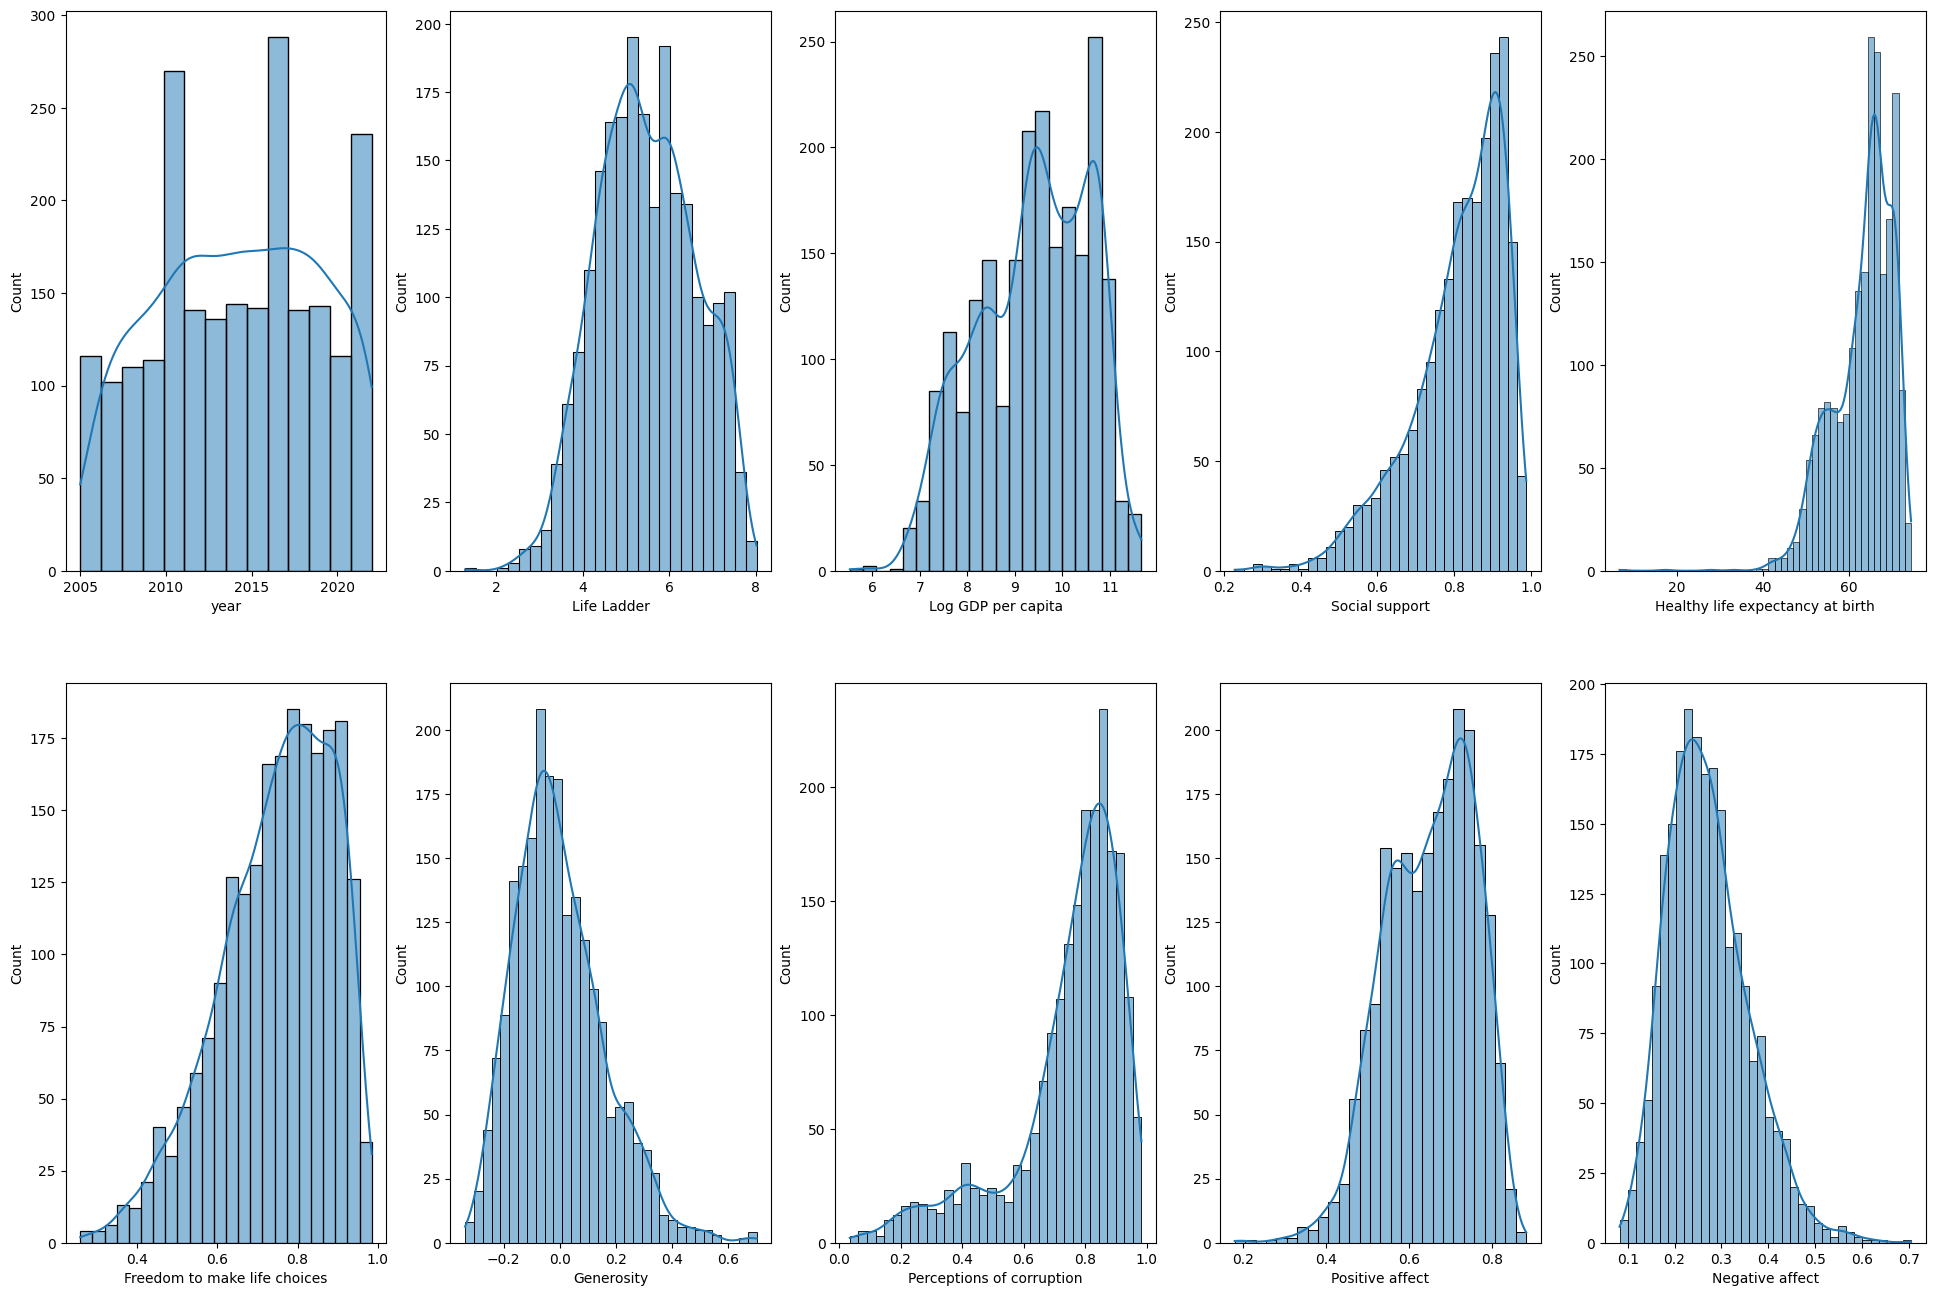

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24, 16))

col_idx = 1
for row in axes:
    for col in row:
        sns.histplot(df.iloc[:, col_idx], ax=col, kde=True)
        col_idx += 1
    
plt.show()

# Bivariate Analysis

<Axes: >

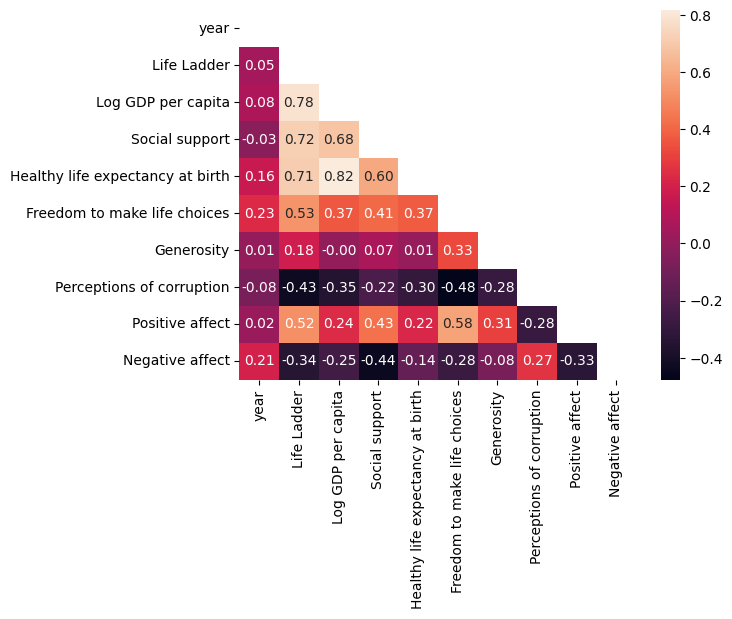

In [6]:
matrix = df.drop(['Country name'], axis=1).corr()
sns.heatmap(matrix, annot=True, fmt='.02f', mask=np.triu(np.ones_like(matrix, dtype=bool)))

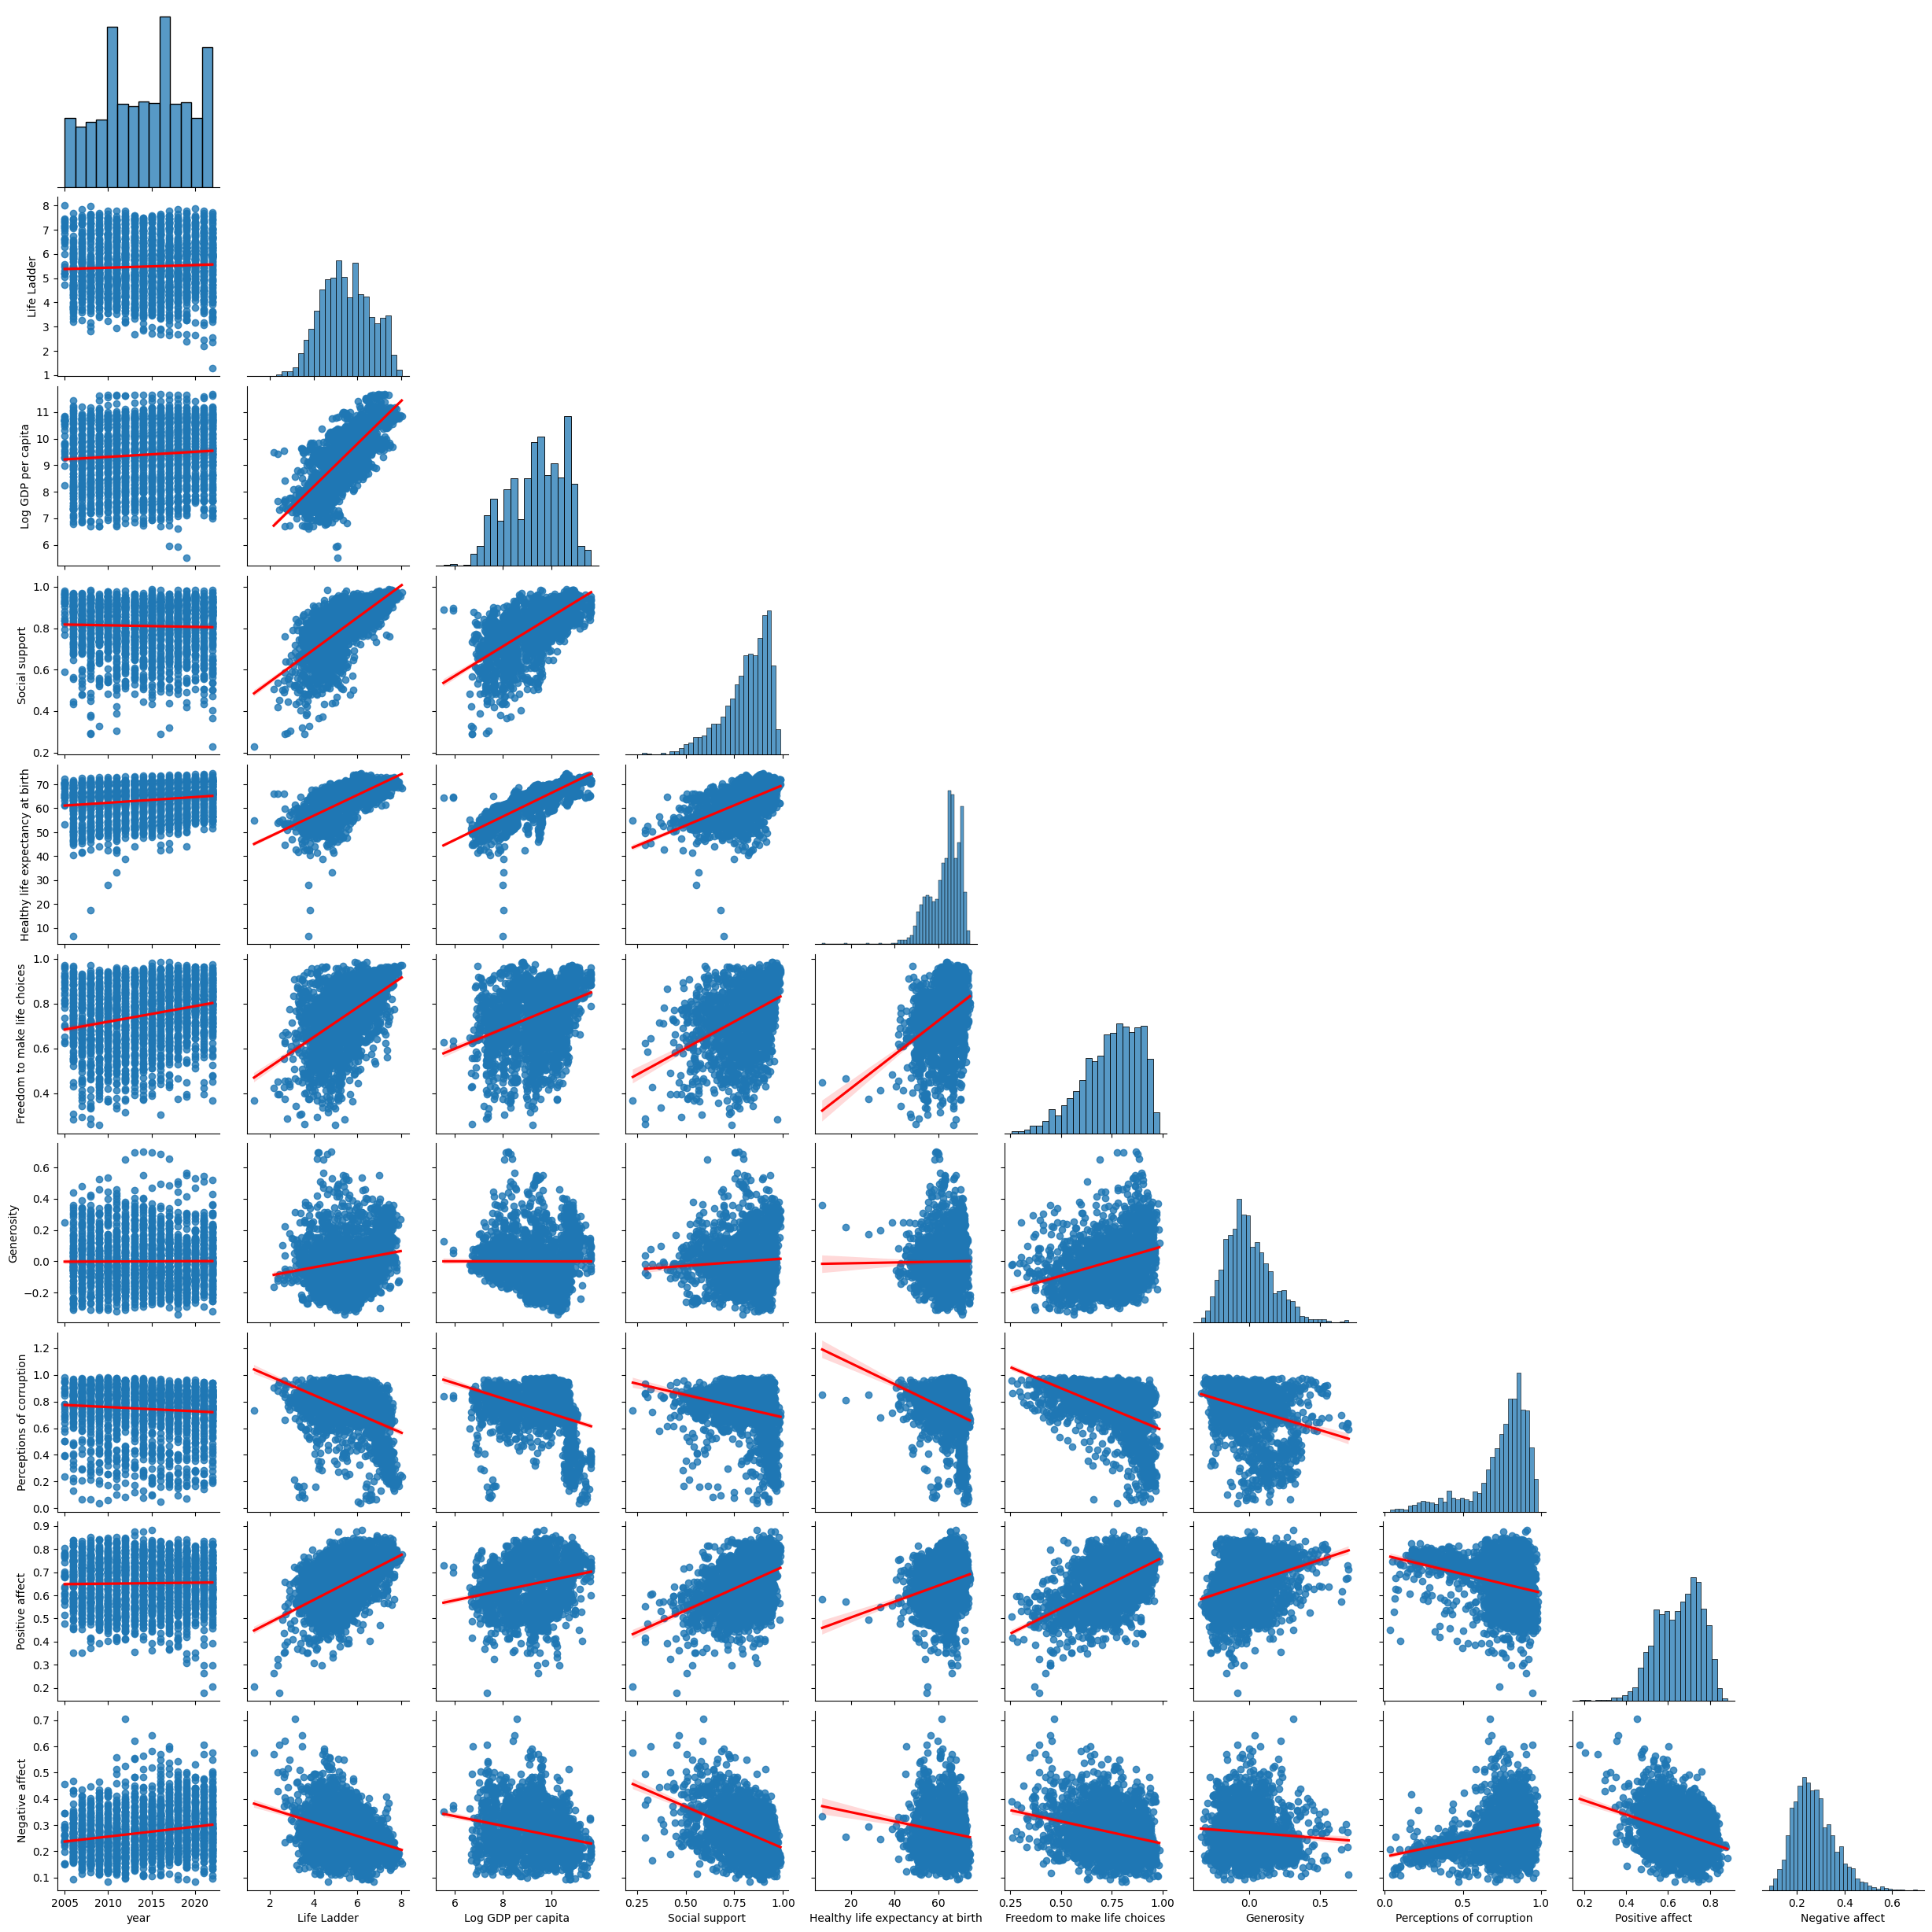

In [7]:
sns.pairplot(df, kind="reg", corner=True, plot_kws={'line_kws':{'color':'red'}})

# Data Quality

In [8]:
df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   20
Social support                       13
Healthy life expectancy at birth     54
Freedom to make life choices         33
Generosity                           73
Perceptions of corruption           116
Positive affect                      24
Negative affect                      16
dtype: int64

In [9]:
df[df['Log GDP per capita'].isnull()]

# Taiwan, Syria, Palestine, Venezuela, Djibouti and Yemen are from the Penn World Table 10.01
# PWT database covers 183 countries between 1950 and 2019 (explains missing data for those countries past 2019)
# See: https://www.rug.nl/ggdc/productivity/pwt/

# GDP per capita in 2022 are not yet available as of January 2023 according to the data documentation

# Kosovo 2007 had protests against the UN regarding its future status 

# South Sudan was in a civil war from 2013 to 2020

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281271,NaN,0.228217,54.875000,0.368377,NaN,0.733198,0.205868,0.575512
475,Cuba,2006,5.417869,NaN,0.969595,68.000000,0.281458,NaN,NaN,0.596187,0.276602
490,Cyprus,2022,5.864757,NaN,0.819547,73.000000,0.698407,NaN,0.887328,0.659326,0.296999
1031,Kosovo,2007,5.103906,NaN,0.847812,NaN,0.381364,NaN,0.894462,0.613723,0.236699
1237,Malta,2022,6.299238,NaN,0.932083,71.650002,0.837544,NaN,0.757540,0.671104,0.370075
1755,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.707874,0.112012
1756,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.631947,0.083426
1757,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.690514,0.122244
1758,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428
1792,South Sudan,2014,3.831992,NaN,0.545118,52.880001,0.567259,NaN,0.741541,0.578410,0.428320


In [10]:
df[df['Perceptions of corruption'].isnull()]['Country name'].value_counts()

"""
In case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level
"""

# China never reports
# Saudi Arabia reported only 3 times
# UAE only reported 3 times

'\nIn case the perception of government corruption is missing, we use the perception\nof business corruption as the overall perception. The corruption perception at\nthe national level is just the average response of the overall perception at the\nindividual level\n'

In [11]:
df[df['Country name'] == 'China']

# All 16 rows of China have no Perceptions of corruption

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
381,China,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN,0.657659,0.169580
382,China,2007,4.862862,8.823968,0.810852,65.919998,NaN,-0.178883,NaN,0.663977,0.158614
383,China,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.095184,NaN,0.705133,0.146963
384,China,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.163264,NaN,0.669666,0.161650
385,China,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.136182,NaN,0.658101,0.158100
386,China,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.189271,NaN,0.710055,0.133503
387,China,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.187489,NaN,0.689160,0.158703
388,China,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.160523,NaN,0.717136,0.142211
389,China,2014,5.195619,9.380201,0.820366,67.739998,NaN,-0.219485,NaN,0.709763,0.111518
390,China,2015,5.303878,9.442431,0.793734,68.000000,NaN,-0.247149,NaN,0.666827,0.171315


In [12]:
df[df['Country name'] == 'Saudi Arabia']

# Only 3 rows of Saudi Arabia have values for Perceptions of corruption

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1648,Saudi Arabia,2005,7.079644,10.674833,0.867819,61.200001,NaN,NaN,0.505149,0.680691,0.242553
1649,Saudi Arabia,2007,7.266694,10.641758,0.891525,61.599998,0.622070,0.003791,NaN,0.718203,0.231547
1650,Saudi Arabia,2008,6.811370,10.663842,0.823054,61.799999,0.531812,-0.022041,0.507919,0.606721,0.201823
1651,Saudi Arabia,2009,6.147590,10.605604,0.921288,62.000000,0.639406,-0.109222,0.445132,0.682755,0.319475
1652,Saudi Arabia,2010,6.307098,10.622705,0.879598,62.200001,0.677777,-0.031792,NaN,0.645319,0.297209
1653,Saudi Arabia,2011,6.699790,10.693172,0.829634,62.400002,0.603456,-0.141503,NaN,0.698994,0.240140
1654,Saudi Arabia,2012,6.396359,10.723874,0.867101,62.599998,0.560455,-0.119786,NaN,0.691676,0.224841
1655,Saudi Arabia,2013,6.495133,10.729292,0.826695,62.799999,0.661042,-0.082016,NaN,0.691166,0.275550
1656,Saudi Arabia,2014,6.278378,10.744945,0.818420,63.000000,0.762252,-0.074081,NaN,0.663331,0.312949
1657,Saudi Arabia,2015,6.345492,10.765942,0.819750,63.200001,0.820207,-0.046799,NaN,0.667653,0.327139


In [13]:
df[df['Country name'] == 'United Arab Emirates']

# Only 3 rows of UAE have values for Perceptions of corruption

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2039,United Arab Emirates,2006,6.734222,11.433055,0.903410,64.860001,0.897557,-0.042062,0.203359,0.693962,0.275255
2040,United Arab Emirates,2009,6.866063,10.952468,0.885089,65.040001,0.848822,0.016183,0.338876,0.718199,0.287074
2041,United Arab Emirates,2010,7.097456,10.908972,0.911762,65.099998,0.877751,0.052679,0.355116,0.700749,0.233014
2042,United Arab Emirates,2011,7.118701,10.965007,0.881369,65.160004,0.889463,0.064719,NaN,0.701554,0.215870
2043,United Arab Emirates,2012,7.217767,11.001253,0.855877,65.220001,0.919793,NaN,NaN,0.719470,0.223985
2044,United Arab Emirates,2013,6.620951,11.040596,0.863716,65.279999,0.935979,NaN,NaN,NaN,0.291113
2045,United Arab Emirates,2014,6.539855,11.071845,NaN,65.339996,NaN,NaN,NaN,NaN,NaN
2046,United Arab Emirates,2015,6.568398,11.128389,0.824137,65.400002,0.915036,0.193461,NaN,0.722089,0.295733
2047,United Arab Emirates,2016,6.830950,11.173874,0.849380,65.550003,0.949120,0.121525,NaN,0.739081,0.244668
2048,United Arab Emirates,2017,7.039420,11.173000,0.835527,65.699997,0.962017,0.207090,NaN,0.737349,0.207598


In [14]:
df[df['Generosity'].isnull() & df['Log GDP per capita'].notna()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
32,Algeria,2014,6.354898,9.355415,0.818189,65.900002,NaN,NaN,NaN,0.558359,0.176866
33,Algeria,2016,5.340854,9.383312,0.748588,66.099998,NaN,NaN,NaN,0.565026,0.377112
76,Australia,2005,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012
124,Bahrain,2012,5.027187,10.774646,0.911350,65.480003,0.681823,NaN,0.437915,0.559416,0.380815
125,Bahrain,2013,6.689711,10.797851,0.883781,65.720001,0.809206,NaN,0.524703,0.711108,0.306209
126,Bahrain,2014,6.165134,10.801981,NaN,65.959999,NaN,NaN,NaN,NaN,NaN
163,Belgium,2005,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380
242,Brazil,2005,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780
248,Brazil,2012,6.660004,9.643767,0.890314,64.220001,0.848606,NaN,0.622543,0.685311,0.349759
381,China,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN,0.657659,0.169580


In [15]:
df[df['Generosity'].isnull() & df['Log GDP per capita'].notna()]['year'].value_counts()

# It appears that 2005 is often missing Generosity data
# Some years seem to correspond to certain periods of instability

# Japan 2012 may be a rollover from the Fukushima accident in 2011
# Arab Spring was occurring from 2010 to 2012 which can explain some SWANA countries

year
2005    26
2012     7
2006     7
2014     4
2013     3
2016     1
2008     1
2019     1
2011     1
2015     1
2017     1
Name: count, dtype: int64

# Data Analysis

In [16]:
# What is the happiest country in 2023?

print(df['Country name'][df[df['year'] == 2022]['Life Ladder'].idxmax()])

# In 2013?
print(df['Country name'][df[df['year'] == 2013]['Life Ladder'].idxmax()])

# Of all time?
print(df['Country name'][df['Life Ladder'].idxmax()])

Finland
Canada
Denmark


In [17]:
# What is the least happy country in 2023, 2013 and of all time?

print(df['Country name'][df[df['year'] == 2022]['Life Ladder'].idxmin()])

print(df['Country name'][df[df['year'] == 2013]['Life Ladder'].idxmin()])

print(df['Country name'][df['Life Ladder'].idxmin()])

Afghanistan
Syria
Afghanistan


In [18]:
def get_country_happiness(dataframe):
    for country in df['Country name'].unique():
        country_data = df[df['Country name'] == country]
        start = country_data.iloc[0]['Life Ladder']
        end = country_data.iloc[-1]['Life Ladder']
        yield country, start, end

In [19]:
# Which country had the largest increase in happiness from its start of participation to 2023?

increase_country, increase = None, 0
for country, start, end in get_country_happiness(df):
    if end - start > increase:
        increase_country = country
        increase = end-start
        
print(f'The country with the largest increase in happiness ({increase:0.2f}) was {increase_country}')

The country with the largest increase in happiness (1.99) was Congo (Brazzaville)


In [20]:
# Which had the largest decrease in happiness?
decrease_country, decrease = None, float('inf')
for country, start, end in get_country_happiness(df):
    if end - start < decrease:
        decrease_country = country
        decrease = end-start
        
print(f'The country with the largest decrease in happiness ({decrease:0.2f}) was {decrease_country}')

The country with the largest decrease in happiness (-3.14) was Lebanon
